In [91]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
import numpy as np

In [78]:
data = pd.read_csv("data/chembl_Vasopressin_V1a_receptor_KI.csv", delimiter = ";")

In [79]:
data.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL1085301,NaN,0,403.52,1,6.15,13a,COc1cc(C(=O)N2C[C@]3(C)C[C@H]2CC(C)(C)C3)ccc1-...,Ki,'=',...,Vasopressin V1a receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL1155536,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2010.0,None,NaN
1,CHEMBL1084008,NaN,0,402.54,1,5.88,13f,COc1cc(C(=O)N2C[C@]3(C)C[C@H]2CC(C)(C)C3)ccc1-...,Ki,'=',...,Vasopressin V1a receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL1155536,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2010.0,None,NaN
2,CHEMBL4173250,NaN,0,524.63,1,3.99,3c,Cn1ncc2c1Nc1ccccc1N(C(=O)Cc1ccc(N3CCN(Cc4cc(O)...,Ki,'=',...,Vasopressin V1a receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4138154,1,Scientific Literature,Eur J Med Chem,2018.0,None,NaN
3,CHEMBL382301,ATOSIBAN,4,994.21,3,-3.04,Atosiban,CCOc1ccc(C[C@H]2NC(=O)CCSSC[C@@H](C(=O)N3CCC[C...,Ki,'=',...,Vasopressin V1a receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL1142309,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2008.0,None,NaN
4,CHEMBL1085299,NaN,0,377.53,1,5.71,12k,COc1cc(C(=O)N2C[C@]3(C)C[C@H]2CC(C)(C)C3)ccc1-...,Ki,'=',...,Vasopressin V1a receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL1155536,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2010.0,None,NaN


In [80]:
data["Smiles"]

0       COc1cc(C(=O)N2C[C@]3(C)C[C@H]2CC(C)(C)C3)ccc1-...
1       COc1cc(C(=O)N2C[C@]3(C)C[C@H]2CC(C)(C)C3)ccc1-...
2       Cn1ncc2c1Nc1ccccc1N(C(=O)Cc1ccc(N3CCN(Cc4cc(O)...
3       CCOc1ccc(C[C@H]2NC(=O)CCSSC[C@@H](C(=O)N3CCC[C...
4       COc1cc(C(=O)N2C[C@]3(C)C[C@H]2CC(C)(C)C3)ccc1-...
                              ...                        
1712               O=S(=O)(Nc1ccnn1-c1ccccn1)c1ccc(Cl)cc1
1713    CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=...
1714    CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=...
1715    COc1ccc(S(=O)(=O)N2c3ccc(Cl)cc3[C@](O)(c3ccccc...
1716    CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=...
Name: Smiles, Length: 1717, dtype: object

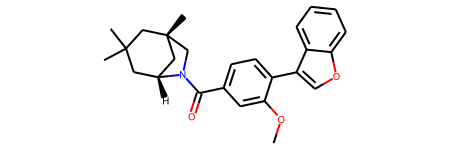

In [81]:
Chem.MolFromSmiles(data.loc[0, 'Smiles'])

In [82]:
smiles = data["Smiles"]
# smiles.dropna(inplace=True)
smiles.fillna("", inplace = True)

In [83]:
molecules = [Chem.MolFromSmiles(smile) for smile in smiles]

In [84]:
molecules[:5]

In [87]:
data["rdkit"] = molecules

In [90]:
data["molecular_weight"] = data["rdkit"].apply(Descriptors.MolWt)

In [93]:
data["mol_logP"] = data["rdkit"].apply(Descriptors.MolLogP)

In [94]:
data["numh_acceptors"] = data["rdkit"].apply(Descriptors.NumHAcceptors)